In [118]:
import os
import re
from itertools import islice
import spacy
import pandas as pd

In [135]:
def get_all_case_filenames():
    """Return a list of all filenames in the cases directory"""
    cases = []
    for root, dirs, files in os.walk("./cases/", topdown=False):
        for name in files:
            cases.append(os.path.join(root, name))
    return cases

def get_cleaned_string_from_file(filename):
    """Return the content of a file as a string with the first line removed and newlines striped"""
    with open(filename, "r", encoding="utf-8") as file:
        # skip the first line with the name of the judge
        content = ""
        for line in islice(file, 1, None):
            content += line.strip()
    return content

def get_spacy_doc(nlp, string):
    """Load a string into a spacy document"""
    return nlp(string)

def get_sentences(nlp, doc):
    """Return all sentences of a spacy doc"""
    return [sent.string.strip() for sent in doc.sents]

def get_words(nlp, doc):
    """Return all tokens except punctuation from a spacy document (=words)"""
    return [token.text for token in doc if not token.is_punct and not token.is_currency and not token.like_num]

def get_year_from_filename(filename):
    """Return the year extracted from the filename"""
    return re.search("\d{4}", filename).group(0)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B6BDF10128>,
      dtype=object)

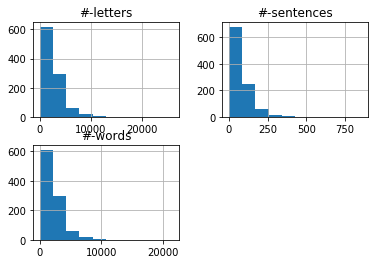

In [136]:
nlp = spacy.load("en")
cases_dataframe = pd.DataFrame()
filenames = get_all_case_filenames()
spacy_docs = [(filename, get_spacy_doc(nlp, get_cleaned_string_from_file(filename))) for filename in filenames[:1000]]
for doc in enumerate(spacy_docs):
    sentences = get_sentences(nlp, doc[1][1])
    words = get_words(nlp, doc[1][1])
    cases_dataframe = cases_dataframe.append({'#-sentences': len(sentences), '#-words': len(words), '#-letters': len(doc[1][1])}, ignore_index=True)
cases_dataframe.hist() # histograms for task 1

In [137]:
pos_dataframe = pd.DataFrame()
for doc in enumerate(spacy_docs):
    word_type_to_row = {"NOUN": "#-nouns", "VERB": "#-verbs", "ADJ": "#-adjectives"}
    row = {"#-nouns": 0, "#-verbs": 0, "#-adjectives": 0, "year": get_year_from_filename(doc[1][0])}
    for token in doc[1][1]:
        word_type = token.pos_
        if word_type in word_type_to_row.keys():
            row[word_type_to_row[word_type]] += 1
    pos_dataframe = pos_dataframe.append(row, ignore_index=True)
pos_dataframe.groupby(["year"])["#-nouns", "#-verbs", "#-adjectives"].sum()

#-nouns  #-verbs  #-adjectives
year                                
1924   4132.0   3060.0        1413.0
1925  19627.0  14165.0        5643.0
1926  20798.0  15597.0        6558.0
1927  15592.0  12177.0        5104.0
1928  12094.0   9029.0        3767.0
1929  20984.0  15351.0        7078.0
1930  19379.0  14863.0        6472.0
1931  17592.0  13465.0        5553.0
1932  37790.0  27338.0       11482.0
1933  30278.0  21957.0       10094.0
1934  29340.0  20719.0        9467.0
1935  26709.0  18567.0        8121.0
1936  36427.0  26990.0       11875.0
1937  33464.0  24464.0       10763.0
1938  32206.0  23565.0       10802.0
1939  44591.0  32471.0       14232.0
1940  49778.0  37167.0       15820.0
1941  24309.0  18308.0        7800.0

In [138]:
pos_dataframe

#-adjectives  #-nouns  #-verbs  year
0           298.0   1045.0    946.0  1924
1           124.0    409.0    268.0  1924
2           237.0    682.0    467.0  1924
3           259.0    803.0    461.0  1924
4           495.0   1193.0    918.0  1924
5             0.0      2.0      1.0  1925
6            22.0     79.0     60.0  1925
7             8.0     50.0     36.0  1925
8             0.0      2.0      2.0  1925
9           194.0    703.0    424.0  1925
10           79.0    245.0    146.0  1925
11          205.0    782.0    493.0  1925
12           41.0    143.0    101.0  1925
13           32.0    143.0     99.0  1925
14          246.0    943.0    630.0  1925
15          104.0    411.0    252.0  1925
16           17.0     89.0     47.0  1925
17           77.0    202.0    153.0  1925
18           58.0    267.0    174.0  1925
19          128.0    481.0    375.0  1925
20           41.0    143.0    111.0  1925
21          132.0    371.0    285.0  1925
22           86.0    213.0    212.0  1925
23          498.0   1718.0   1237.0  1925
24           53.0    253.0    227.0  1925
25          257.0    747.0    480.0  1925
26           87.0    213.0    223.0  1925
27           41.0    188.0    144.0  1925
28           26.0     97.0     84.0  1925
29          331.0   1208.0    847.0  1925
..            ...      ...      ...   ...
970         365.0   1109.0    802.0  1941
971         560.0   1646.0   1376.0  1941
972         108.0    475.0    262.0  1941
973          82.0    303.0    248.0  1941
974         156.0    552.0    513.0  1941
975          94.0    313.0    236.0  1941
976         134.0    502.0    329.0  1941
977         221.0    591.0    636.0  1941
978         406.0   1471.0    932.0  1941
979         445.0   1284.0    760.0  1941
980         114.0    587.0    431.0  1941
981           9.0     61.0     42.0  1941
982         297.0    899.0    612.0  1941
983          79.0    270.0    210.0  1941
984         285.0    631.0    477.0  1941
985         153.0    402.0    378.0  1941
986         171.0    580.0    371.0  1941
987         131.0    311.0    222.0  1941
988         105.0    434.0    246.0  1941
989         162.0    503.0    306.0  1941
990         397.0   1328.0   1170.0  1941
991          91.0    239.0    187.0  1941
992         188.0    549.0    414.0  1941
993         143.0    424.0    269.0  1941
994         126.0    359.0    305.0  1941
995         392.0   1204.0    886.0  1941
996         162.0    515.0    410.0  1941
997          78.0    235.0    192.0  1941
998         275.0    917.0    644.0  1941
999          87.0    249.0    227.0  1941

[1000 rows x 4 columns]